In [1]:
#Telco_customer_churn

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [4]:
df.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [6]:
# Convert 'Total Charges' to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [7]:
df.isnull().sum()

Customer ID                             0
Count                                   0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                    

array([[<Axes: title={'center': 'Count'}>,
        <Axes: title={'center': 'Number of Referrals'}>,
        <Axes: title={'center': 'Tenure in Months'}>],
       [<Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>,
        <Axes: title={'center': 'Monthly Charge'}>],
       [<Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Refunds'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

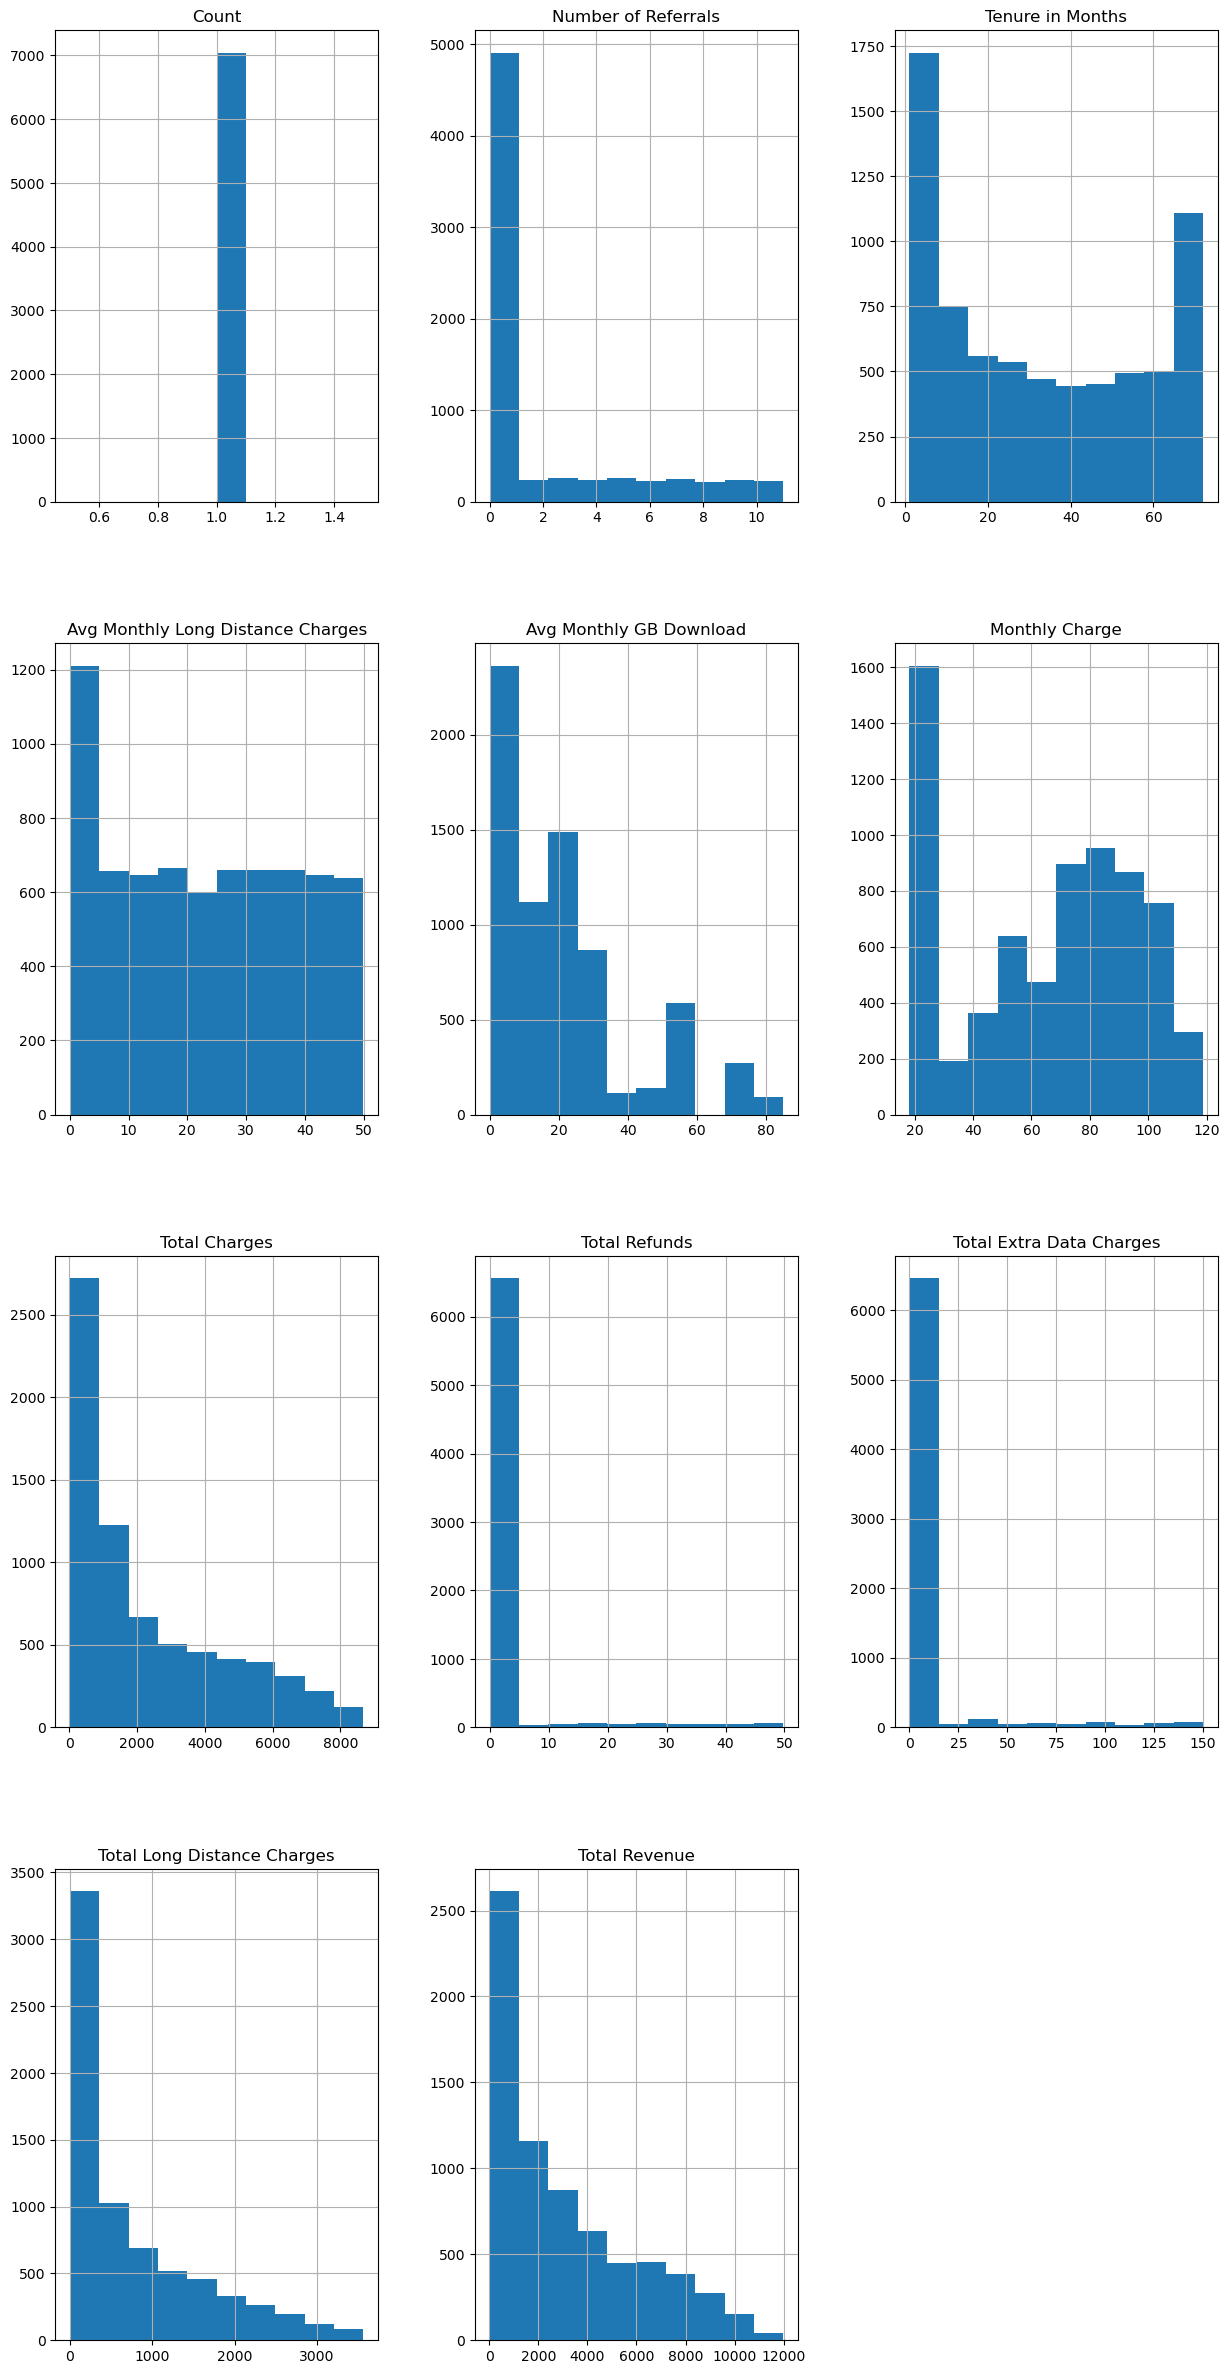

In [8]:
df.hist(figsize=(15, 30))

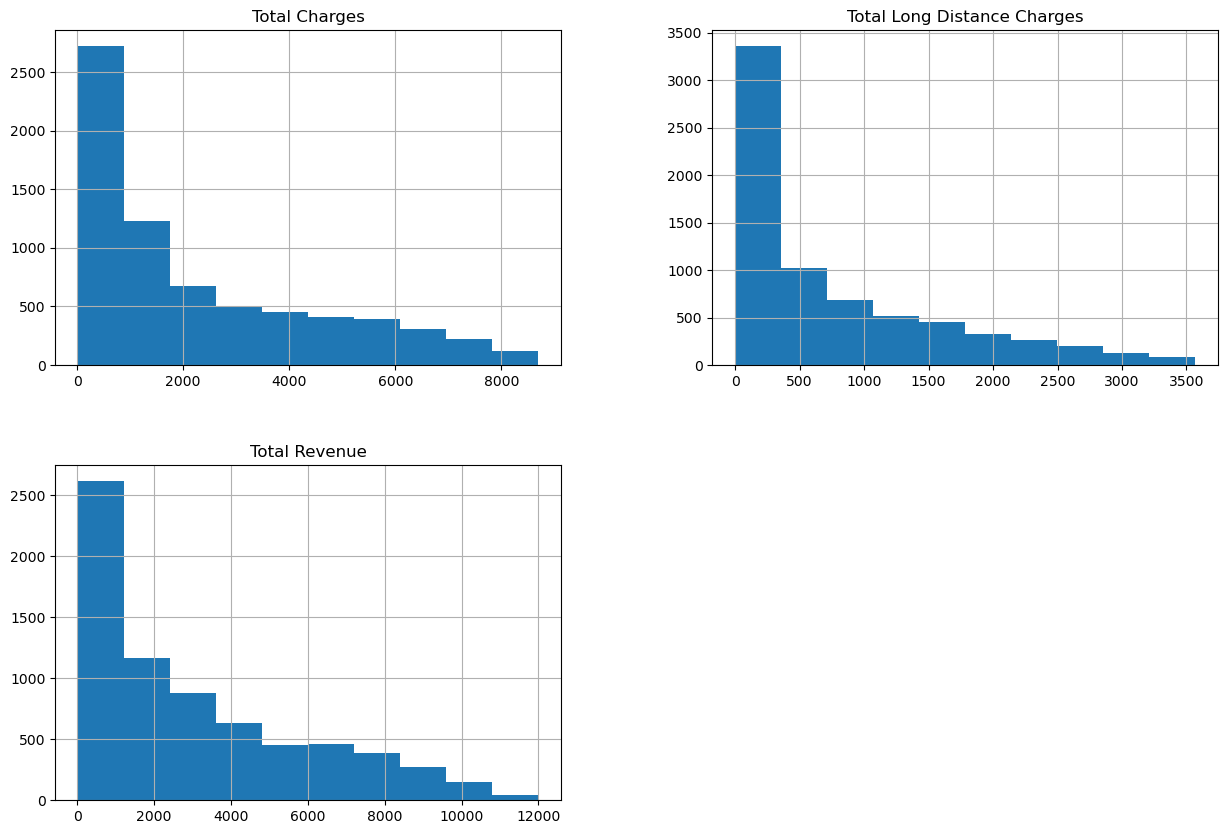

In [9]:
df[['Total Charges', 'Total Long Distance Charges', 'Total Revenue']].hist(figsize=(15, 10))
plt.show()

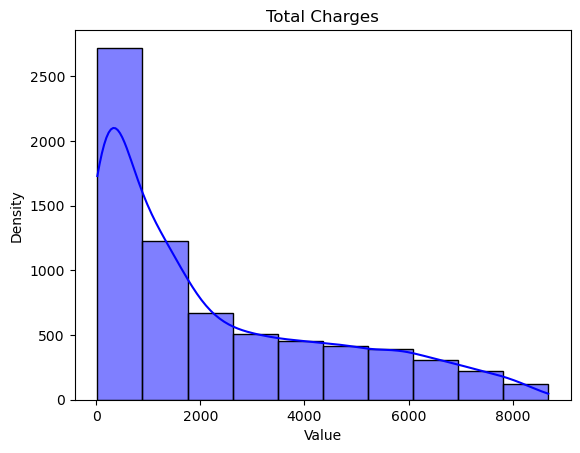

In [10]:
sns.histplot(df['Total Charges'], bins=10, kde=True, color='blue')
plt.title('Total Charges')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

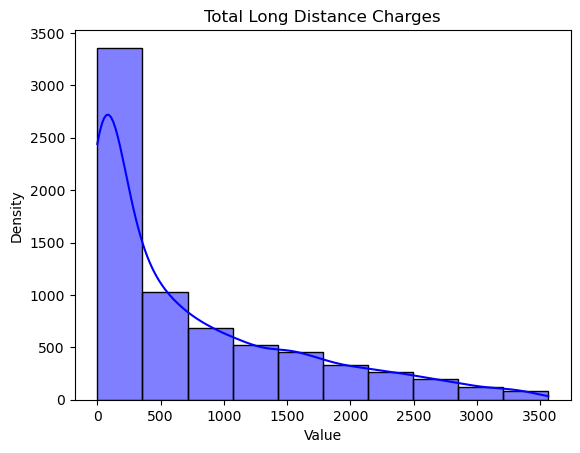

In [11]:
sns.histplot(df['Total Long Distance Charges'], bins=10, kde=True, color='blue')
plt.title('Total Long Distance Charges')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

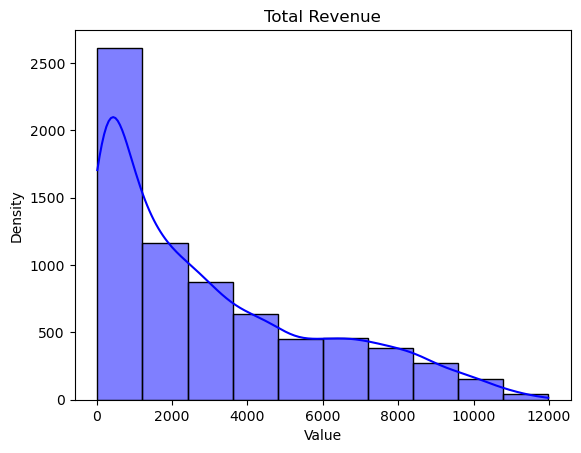

In [12]:
sns.histplot(df['Total Revenue'], bins=10, kde=True, color='blue')
plt.title('Total Revenue')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [13]:
# Log Transformation
col_num = ['Total Charges', 'Total Long Distance Charges', 'Total Revenue']
df[col_num] = df[col_num].transform(lambda x: np.log(x + 1))

In [14]:
scaler = StandardScaler()
X = df[['Total Charges', 'Total Long Distance Charges', 'Total Revenue']]
X_scaled = scaler.fit_transform(X)

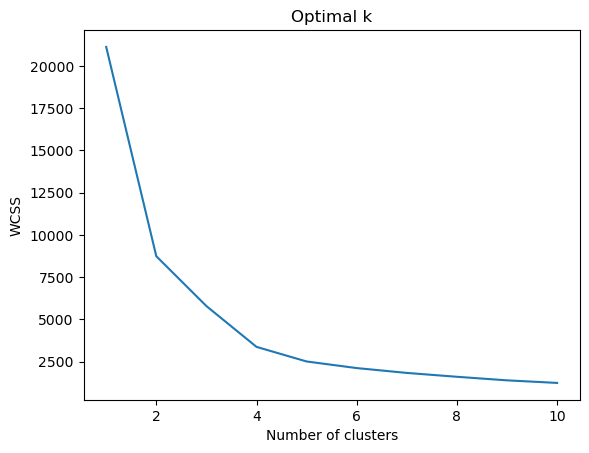

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

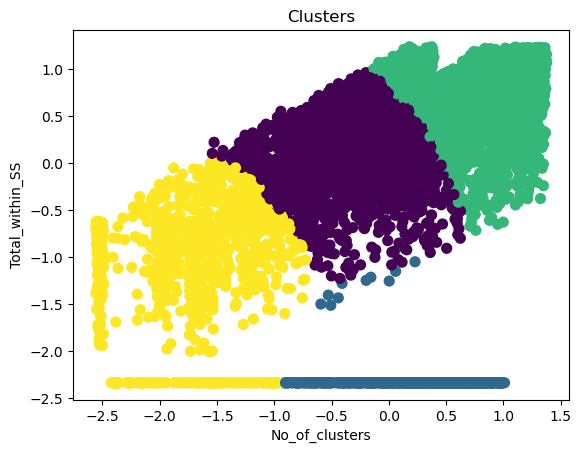

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('Clusters')
plt.xlabel('No_of_clusters')
plt.ylabel('Total_within_SS')
plt.show()